In [3]:
import pandas as pd
import requests
import time
import os
import sys

In [ ]:
API = os.environ['API']

In [36]:
class City:
  def __init__(self, city=None, page=None):
    if city == None or page == None:
        sys.exit('No city ID or page limit provided')
    elif type(city) != int or type(page) != int:
        sys.exit('Provide an integer value')
    else:
        self.city_id = city
        self.page_limit = page
        self.get_property_list()
        print(len(self.ID_list))
        self.output = pd.DataFrame()
        self.get_data_from_99acres()        
  
  def get_property_list(self):
    count = 1
    self.ID_list = []
    while(count <= self.page_limit):
      url = f"https://www.99acres.com/api-aggregator/srp/search?property_type=1&area_unit=1&platform=DESKTOP&moduleName=GRAILS_SRP&workflow=GRAILS_SRP&page_size=30&page={count}&city={self.city_id}&preference=S&res_com=R&seoUrlType=DEFAULT"
      response = requests.get(url)
      response = response.json()
      if response['status']['code'] != 1:
        print("You are either having internet issues else 99acres throwing ReCaptcha at ypou. Try to slow down the API request and try later.")
        break
      else:
        ids = response['properties']
        c = 1
        for id in ids:
          if c != 31:
            self.ID_list.append(id['PROP_ID'])
            c += 1
      count += 1

  def get_data_from_99acres(self):
    for id in self.ID_list:
      property_data = NineNineAcres(id)
      self.output = self.output.append(property_data.get_data(), ignore_index=True)
  
  def get_df(self):
    return self.output

In [37]:
class NineNineAcres:
  def __init__(self, id=None):
    if id == None:
      sys.exit('No property ID provided')
    else:
      self.property_ID = id
  
  def get_data(self):
    try:
      url = f"https://www.99acres.com/api-aggregator/psuedoData?prop_id={self.property_ID}&stage=load"
      # time.sleep(0.4)
      response = requests.get(url)
      response = response.json()

      prop_data = response['propertyDetails']['prop_data']

      lattitude = prop_data['Latitude']
      longitude = prop_data['Longitude']
      post_date = prop_data['Modify_Date']
      availability_date = prop_data['Availability_Info']['Availability_Date']
      owner_name = prop_data['company_label']
      property_name = prop_data['Prop_Name']
      id = prop_data['Building_Id']
      locality_name = prop_data ['Locality_Name']
      base_price = prop_data['Price_Per_Unit_Area']

      for floor in response['floorPlan']:
        area_sqft = floor['SALEABLE_AREA_SQFT']
        price = floor['NEW_BOOKING_PRICE']['min']
        details = floor['unitDetailSectionParts']
        bedrooms = details['bedrooms']
        kitchens = details['kitchens']
        bathroom = details['bathroom']
        balcony = details['balcony']
        living = details['living']
        data = {'id': id, 
                'lattitude': lattitude, 
                'longitude': longitude, 
                'post_date': post_date, 
                'availability_date': availability_date, 
                'owner_name': owner_name, 
                'property_name': property_name, 
                'locality_name': locality_name, 
                'base_price': base_price, 
                'area_sqft': area_sqft, 
                'price': price, 
                'bedrooms': bedrooms, 
                'kitchens': kitchens, 
                'bathroom': bathroom, 
                'balcony': balcony, 
                'living': living}
          
      return data
    except:
      print(f"ID - {self.property_ID} did not work.")


In [38]:
kolkata = City(25, 1)
# Pune = City(19, 2)
kolkata.get_df()

30


,area_sqft,availability_date,balcony,base_price,bathroom,bedrooms,id,kitchens,lattitude,living,locality_name,longitude,owner_name,post_date,price,property_name
0,836.0,"Apr 01, 2021",1,2500,2,2.0,344071,1.0,22.643298,1,Howrah,88.197119,Belmonte Enclave LLP.,"Nov 09, 2020",2090000.0,Belmont Swarna Bhoomi
1,480.0,0,None,3250,None,1.0,1029788,0.0,22.636942,None,Dum Dum Cantt.,88.411775,Digi Developers Pvt.Ltd,"Nov 09, 2020",1560000.0,Digi Shree
2,2062.0,0,2,8490,4,4.0,183405,1.0,22.573977,1,Narkeldanga,88.398249,Prasad Group,"Oct 29, 2020",17500000.0,Prasad Rare Earth
3,1340.0,0,1,8508,3,3.0,183405,1.0,22.573977,1,Narkeldanga,88.398249,Prasad Group,"Oct 29, 2020",11400000.0,Prasad Rare Earth
4,1419.0,"Dec 01, 2022",2,4600,2,3.0,349053,1.0,22.588327,1,New Town,88.49746,Realtech Nirman Pvt Ltd,"Oct 23, 2020",6527400.0,Realtech Nirman Hijibiji
5,900.0,"Dec 01, 2022",1,4600,2,2.0,349053,1.0,22.588327,1,New Town,88.49746,Realtech Nirman Pvt Ltd,"Oct 23, 2020",4140000.0,Realtech Nirman Hijibiji
6,929.0,"May 01, 2023",1,9911,3,3.0,778780,1.0,22.582182,1,New Town,88.487992,PS Group Realty Ltd,"Sep 16, 2020",9139502.0,PS Amistad
7,2060.0,0,1,4050,3,4.0,78720,0.0,22.670682,None,B T Road,88.376096,Dhoot Realtors,"Aug 13, 2020",8343000.0,Dhoot Pratham
8,958.0,"Dec 01, 2022",1,3100,2,3.0,547367,1.0,22.592255,1,Rajarhat,88.508835,Realtech Nirman Pvt Ltd,"Nov 02, 2020",2969800.0,Realtech Rajotto
9,1073.0,"Jan 01, 2025",None,5363,2,2.0,1048210,1.0,22.567551,1,New Town,88.463143,Ashish Goyal,"Oct 23, 2020",5311350.0,Purti Veda


In [ ]:
output = pd.DataFrame()

for id in ID_list:
  try:
    url = f"https://www.99acres.com/api-aggregator/psuedoData?prop_id={id}&stage=load"
    # time.sleep(0.4)
    response = requests.get(url)
    response = response.json()

    prop_data = response['propertyDetails']['prop_data']

    lattitude = prop_data['Latitude']
    longitude = prop_data['Longitude']
    post_date = prop_data['Modify_Date']
    availability_date = prop_data['Availability_Info']['Availability_Date']
    owner_name = prop_data['company_label']
    property_name = prop_data['Prop_Name']
    id = prop_data['Building_Id']
    locality_name = prop_data ['Locality_Name']
    base_price = prop_data['Price_Per_Unit_Area']

    for floor in response['floorPlan']:
      area_sqft = floor['SALEABLE_AREA_SQFT']
      price = floor['NEW_BOOKING_PRICE']['min']
      details = floor['unitDetailSectionParts']
      bedrooms = details['bedrooms']
      kitchens = details['kitchens']
      bathroom = details['bathroom']
      balcony = details['balcony']
      living = details['living']
      data = {'id': id, 
              'lattitude': lattitude, 
              'longitude': longitude, 
              'post_date': post_date, 
              'availability_date': availability_date, 
              'owner_name': owner_name, 
              'property_name': property_name, 
              'locality_name': locality_name, 
              'base_price': base_price, 
              'area_sqft': area_sqft, 
              'price': price, 
              'bedrooms': bedrooms, 
              'kitchens': kitchens, 
              'bathroom': bathroom, 
              'balcony': balcony, 
              'living': living}
      output = output.append(data, ignore_index=True)
  except:
    pass

In [ ]:
count = 1
ID_list = []
while(count <= 150):
  url = f"https://www.99acres.com/api-aggregator/srp/search?property_type=1&area_unit=1&platform=DESKTOP&moduleName=GRAILS_SRP&workflow=GRAILS_SRP&page_size=30&page={count}&city=25&preference=S&res_com=R&seoUrlType=DEFAULT"
  response = requests.get(url)
  response = response.json()
  if response['status']['code'] != 1:
      break
  else:
    ids = response['properties']
    c = 1
    for id in ids:
      if c != 31:
        ID_list.append(id['PROP_ID'])
        c += 1
  count += 1

print(len(ID_list))

4500


In [ ]:
output.to_csv(r'raw_dataset.csv')

In [ ]:
df = pd.read_csv('raw_dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,area_sqft,availability_date,balcony,base_price,bathroom,bedrooms,id,kitchens,lattitude,living,locality_name,longitude,owner_name,post_date,price,property_name
0,0,1480.0,0,1.0,4050,2.0,3.0,78720,1.0,22.670682,1.0,B T Road,88.376096,Dhoot Realtors,"Nov 03, 2020",5994000.0,Dhoot Pratham
1,1,1500.0,0,2.0,4050,2.0,3.0,78720,1.0,22.670682,1.0,B T Road,88.376096,Dhoot Realtors,"Nov 03, 2020",6075000.0,Dhoot Pratham
2,2,1520.0,0,1.0,4050,2.0,3.0,78720,1.0,22.670682,1.0,B T Road,88.376096,Dhoot Realtors,"Nov 03, 2020",6156000.0,Dhoot Pratham
3,3,1545.0,0,1.0,4050,2.0,3.0,78720,1.0,22.670682,1.0,B T Road,88.376096,Dhoot Realtors,"Nov 03, 2020",6257250.0,Dhoot Pratham
4,4,1580.0,0,2.0,4050,2.0,3.0,78720,1.0,22.670682,1.0,B T Road,88.376096,Dhoot Realtors,"Nov 03, 2020",6399000.0,Dhoot Pratham


In [ ]:
df.shape

(3131, 17)

In [ ]:
df.dtypes

Unnamed: 0             int64
area_sqft            float64
availability_date     object
balcony              float64
base_price             int64
bathroom             float64
bedrooms             float64
id                     int64
kitchens             float64
lattitude            float64
living               float64
locality_name         object
longitude            float64
owner_name            object
post_date             object
price                float64
property_name         object
dtype: object

In [ ]:
tb = pd.pivot_table(df, index=['lattitude', 'longitude'])

In [ ]:
tb

,,Unnamed: 0,area_sqft,balcony,base_price,bathroom,bedrooms,id,kitchens,living,price
lattitude,longitude,,,,,,,,,,
22.263380,88.233450,1229.500000,1022.500000,1.0,3500.000000,1.500000,2.50,1035237,1.000000,NaN,3.578750e+06
22.341433,88.457786,1565.500000,622.500000,1.0,2543.500000,2.000000,1.50,85008,1.000000,1.0,1.595500e+06
22.364447,88.274642,653.285714,665.714286,NaN,2492.714286,1.800000,2.00,504315,0.428571,1.0,1.651757e+06
22.386195,88.424470,343.500000,577.200000,1.0,2600.000000,1.600000,1.60,773431,1.000000,1.0,1.500720e+06
22.386579,88.418330,1794.500000,1015.833333,1.0,3300.000000,1.833333,2.00,93482,1.000000,1.0,3.352250e+06
...,...,...,...,...,...,...,...,...,...,...,...
22.737306,88.351315,3075.250000,753.250000,NaN,2670.750000,1.750000,1.75,754204,1.000000,1.0,2.002500e+06
22.746763,88.485751,1348.600000,873.600000,NaN,2400.000000,2.700000,2.70,762574,0.700000,1.0,2.096640e+06
22.747559,88.338539,3037.500000,843.500000,NaN,3475.500000,2.000000,2.00,1027017,0.000000,NaN,2.982500e+06


In [ ]:
col_one_list = df['lattitude'].tolist()
col_two_list = df['longitude'].tolist()

In [ ]:
col_one_list

In [ ]:
len(col_two_list)

3131

In [ ]:
arr = []
for i in range(0, len(col_one_list)):
  arr.append((col_one_list[i], col_two_list[i])) #Converting to tuple coz set dont work with nested list

In [ ]:
len(arr)

3131

In [ ]:
setlist = set(arr) # converting to set get unique coords to call API
len(setlist)

202

In [ ]:
setlist = list(setlist)

In [ ]:
for i in range(0, len(setlist)):
  setlist[i] = list(setlist[i])

In [ ]:
setlist

[[22.459167, 88.322051],
 [22.398152, 88.421751],
 [22.586761, 88.252898],
 [22.528148, 88.379278],
 [22.570171, 88.447571],
 [22.446267000000002, 88.400093],
 [22.567551, 88.463143],
 [22.699432, 88.37539699999999],
 [22.507655, 88.29985],
 [22.682904, 88.46518],
 [22.57676, 88.442903],
 [22.502032, 88.340406],
 [22.399735, 88.41598],
 [22.563462, 88.39210600000001],
 [22.641998, 88.466071],
 [22.583168, 88.41167800000001],
 [22.454918, 88.386375],
 [22.679944, 88.455308],
 [22.495297, 88.368442],
 [22.528426, 88.35233199999999],
 [22.611104, 88.498101],
 [22.581120000000002, 88.498343],
 [22.585151999999997, 88.273586],
 [22.494129, 88.274638],
 [22.746763, 88.48575100000001],
 [22.711201000000003, 88.50069],
 [22.619295, 88.44737099999999],
 [22.493543, 88.405631],
 [22.610469000000002, 88.497938],
 [22.599933, 88.44998100000001],
 [22.582387, 88.45384200000001],
 [22.594747, 88.262587],
 [22.470755, 88.39710699999999],
 [22.515295000000002, 88.347622],
 [22.436982999999998, 88.3917

In [ ]:
zomatolist = []
for item in setlist:
  headers = {'accept': 'application/json', 'user-key': API}
  response = requests.get(f"https://developers.zomato.com/api/v2.1/geocode?lat={item[0]}&lon={item[1]}", headers=headers)
  response = response.json()
  loc = response['location']['title']
  popularity = response["popularity"]["popularity"]
  nearby = response["nearby_restaurants"]
  price = 0
  rating = 0.0
  for res in nearby:
    price += res["restaurant"]["price_range"]
    rating += float(res["restaurant"]["user_rating"]["aggregate_rating"])
  if len(nearby) != 0:
    zomato_price = price / len(nearby)
    zomato_rating = rating / len(nearby)
  else:
    zomato_price = 0
    zomato_rating = 0
  zomatolist.append([item[0], item[1], loc, popularity, zomato_price, zomato_rating])

In [ ]:
zomatolist 

[[22.459167,
  88.322051,
  'Thakur Pukur',
  '4.43',
  1.6666666666666667,
  3.8666666666666663],
 [22.398152,
  88.421751,
  'Narendra Pur',
  '3.73',
  1.3333333333333333,
  3.933333333333334],
 [22.586761,
  88.252898,
  'Kona Exp Way',
  '3.72',
  1.6666666666666667,
  3.7333333333333334],
 [22.528148,
  88.379278,
  'Picnic Garden',
  '4.93',
  2.5555555555555554,
  4.211111111111111],
 [22.570171,
  88.447571,
  'Sector 5, Salt Lake',
  '4.96',
  3.111111111111111,
  4.277777777777778],
 [22.446267000000002,
  88.400093,
  'Narendra Pur',
  '3.73',
  1.3333333333333333,
  3.933333333333334],
 [22.567551,
  88.463143,
  'New Town',
  '4.00',
  2.888888888888889,
  3.866666666666667],
 [22.699432,
  88.37539699999999,
  'Sodepur',
  '4.43',
  1.4444444444444444,
  4.122222222222222],
 [22.507655,
  88.29985,
  'Behala',
  '4.75',
  1.6666666666666667,
  4.133333333333333],
 [22.682904,
  88.46518,
  'Barasat',
  '4.27',
  1.4444444444444444,
  3.855555555555556],
 [22.57676,
  88.

In [ ]:
def f(x):
  for item in zomatolist:
    if x['lattitude'] == item[0] and x['longitude'] == item[1]:
      return item[2]
  return "x"

df['zomato loc'] = df.apply(f, axis=1)

In [ ]:
def f(x):
  for item in zomatolist:
    if x['lattitude'] == item[0] and x['longitude'] == item[1]:
      return float(item[3])
  return "x"

df['zomato popularity'] = df.apply(f, axis=1)

In [ ]:
def f(x):
  for item in zomatolist:
    if x['lattitude'] == item[0] and x['longitude'] == item[1]:
      return float(item[4])
  return "x"

df['zomato price'] = df.apply(f, axis=1)

In [ ]:
def f(x):
  for item in zomatolist:
    if x['lattitude'] == item[0] and x['longitude'] == item[1]:
      return float(item[5])
  return "x"

df['zomato rating'] = df.apply(f, axis=1)

In [ ]:
df.sample(10)

,Unnamed: 0,area_sqft,availability_date,balcony,base_price,bathroom,bedrooms,id,kitchens,lattitude,living,locality_name,longitude,owner_name,post_date,price,property_name,zomato loc,zomato popularity,zomato price,zomato rating
2446,2446,1460.0,"Dec 01, 2020",1.0,7500,3.0,3.0,335621,1.0,22.567901,1.0,Salt Lake,88.446208,Hamlyn Realty Pvt. Ltd.,"Oct 09, 2020",10950000.0,Merlin 5th Avenue,"Sector 5, Salt Lake",4.96,3.111111,4.277778
1010,1010,1020.0,"Mar 01, 2022",1.0,3800,2.0,2.0,767810,1.0,22.679944,1.0,Airport,88.455308,Bhawani Group,"Aug 20, 2020",3876000.0,Bhawani Courtyard,Barasat,4.27,1.444444,3.855556
1756,1756,1016.0,"Dec 01, 2022",NaN,2200,3.0,3.0,398173,0.0,22.730711,NaN,Barasat,88.454462,S Four Realty,"Oct 12, 2020",2235200.0,Magnolia Nakshatra,Barasat,4.27,1.444444,3.855556
452,452,887.0,"Aug 01, 2022",1.0,3000,2.0,2.0,767899,1.0,22.456015,1.0,Kabardanga,88.331051,Eden Group,"Nov 03, 2020",2661000.0,Eden Tolly Cascades,Thakur Pukur,4.43,1.666667,3.866667
1833,1833,955.0,"Jan 01, 2021",NaN,2800,NaN,2.0,1048270,0.0,22.446924,NaN,Sonarpur,88.392635,AR Realtors,"Nov 02, 2020",2674000.0,Pacheria Kusumba Greens,Narendra Pur,3.73,1.333333,3.933333
3115,3115,876.0,"Nov 01, 2022",NaN,4694,2.0,2.0,475196,0.0,22.628961,NaN,Rajarhat,88.446314,Timberland Projects Pvt Ltd,"Oct 18, 2020",4111944.0,Purti Aqua,New Town,4.60,3.000000,4.077778
787,787,1762.0,0,NaN,5400,3.0,3.0,8360,1.0,22.628549,1.0,Jessore Road,88.417697,SAINT FRANCIS REALTY,"Oct 08, 2020",9514800.0,Emami City,Nagerbazar,4.67,2.111111,4.133333
660,660,1070.0,"Sep 01, 2022",1.0,3350,2.0,3.0,554081,1.0,22.665262,1.0,Dunlop,88.371312,Bagaria Group,"Oct 05, 2020",3584500.0,Bagaria Pravesh,Belghoria,4.52,1.444444,3.911111
956,956,1090.0,"Sep 01, 2021",NaN,3600,NaN,3.0,46798,0.0,22.643210,NaN,Dum Dum Cantt.,88.406803,Bhawani Group,"Oct 17, 2020",3924000.0,Bhawani Dreams,Dum Dum,4.12,1.444444,3.744444
1523,1523,1119.0,"Nov 01, 2023",NaN,3485,NaN,2.0,802832,0.0,22.698573,NaN,Madhyamgram,88.469026,Emar Estate,"Oct 16, 2020",3899715.0,RISHI Ventoso,Barasat,4.27,1.444444,3.855556


In [ ]:
df.to_csv(r'raw_dataset_zomato.csv')

In [ ]:
df.dtypes

Unnamed: 0             int64
area_sqft            float64
availability_date     object
balcony              float64
base_price             int64
bathroom             float64
bedrooms             float64
id                     int64
kitchens             float64
lattitude            float64
living               float64
locality_name         object
longitude            float64
owner_name            object
post_date             object
price                float64
property_name         object
zomato loc            object
zomato popularity    float64
zomato price         float64
zomato rating        float64
dtype: object

In [ ]:
df.corr()

,Unnamed: 0,area_sqft,balcony,base_price,bathroom,bedrooms,id,kitchens,lattitude,living,longitude,price,zomato popularity,zomato price,zomato rating
Unnamed: 0,1.000000,0.097132,0.027613,0.116772,0.126630,0.071830,0.007216,-0.059782,-0.001811,NaN,0.018865,0.124460,0.100825,0.000739,0.045412
area_sqft,0.097132,1.000000,0.147025,0.238627,0.656865,0.666774,-0.284063,0.040626,-0.055792,NaN,0.037104,0.784141,0.134385,0.125179,0.138817
balcony,0.027613,0.147025,1.000000,0.068468,0.113259,0.161392,-0.068142,0.032665,-0.062222,NaN,-0.150303,0.133149,0.002815,-0.100201,-0.000286
base_price,0.116772,0.238627,0.068468,1.000000,0.393356,0.321802,0.022422,0.010953,-0.055901,NaN,0.019285,0.686865,0.411783,0.359384,0.302896
bathroom,0.126630,0.656865,0.113259,0.393356,1.000000,0.762307,-0.019820,-0.093635,-0.036534,NaN,0.033577,0.642329,0.231739,0.248577,0.211762
bedrooms,0.071830,0.666774,0.161392,0.321802,0.762307,1.000000,-0.124693,0.028147,-0.055992,NaN,0.034992,0.577343,0.210184,0.185077,0.168590
id,0.007216,-0.284063,-0.068142,0.022422,-0.019820,-0.124693,1.000000,-0.083315,0.075808,NaN,-0.044407,-0.153581,-0.041740,0.119616,-0.152853
kitchens,-0.059782,0.040626,0.032665,0.010953,-0.093635,0.028147,-0.083315,1.000000,0.014603,NaN,0.057368,0.000265,0.071523,0.184144,0.075064
lattitude,-0.001811,-0.055792,-0.062222,-0.055901,-0.036534,-0.055992,0.075808,0.014603,1.000000,NaN,-0.823450,-0.060916,0.054880,0.069511,-0.051350
living,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


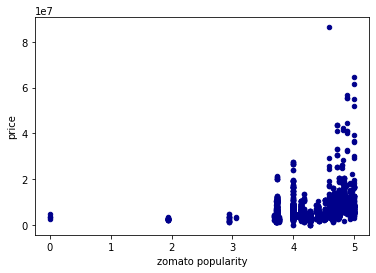

In [ ]:
df.plot.scatter(x='zomato popularity',y='price',c='DarkBlue')